## Tools Setup

In [1]:
import sys, tensorflow as tf
print("Python exe:", sys.executable)
print("GPUs:", tf.config.list_physical_devices('GPU'))
for g in tf.config.list_physical_devices('GPU'):
    try: tf.config.experimental.set_memory_growth(g, True)
    except: pass


2025-09-08 11:30:18.914217: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-08 11:30:18.926000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-08 11:30:18.942891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-08 11:30:18.942912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-08 11:30:18.953765: I tensorflow/core/platform/cpu_feature_gua

Python exe: /home/zaza/lab1_venv/bin/python
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-09-08 11:30:22.473596: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-08 11:30:22.497437: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-08 11:30:22.497567: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
import pathlib, os, sys, operator, re, datetime
from functools import reduce
import numpy as np
import tensorflow as tf
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Model
import tensorflow_datasets as tfds
from tiny_imagenet import TinyImagenetDataset

# Enable or disable GPU
# To fully disable it, we need to hide all GPU devices from Tensorflow
# Make sure GPU is disabled for this inference part of the lab
ENABLE_GPU = False
# tf.debugging.set_log_device_placement(True)

if not ENABLE_GPU:
    tf.config.set_visible_devices([], 'GPU')

# Print Python and TF version, and where we are running
print(f'Running on Python Version: {sys.version}')
print(f'Using Tensorflow Version: {tf. __version__}')
if not tf.config.experimental.list_physical_devices("GPU"):
    print('Running on CPU')
else:
    print(f'Using GPU at: {tf.test.gpu_device_name()} (of {len(tf.config.experimental.list_physical_devices("GPU"))} available)')

Running on Python Version: 3.9.21 (main, Feb 10 2025, 00:00:00) 
[GCC 11.5.0 20240719 (Red Hat 11.5.0-5)]
Using Tensorflow Version: 2.16.2
Using GPU at: /device:GPU:0 (of 1 available)


2025-09-08 11:32:05.591880: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-08 11:32:05.592050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-09-08 11:32:05.592114: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Dataset Inspection

In [3]:
# This cell imports our dataset.

# Original Source: https://github.com/ksachdeva/tiny-imagenet-tfds
# Class Version Source: https://github.com/duweisu/tiny-imagenet-tfds
# Setup our dataset
# ---------------------------------------------------------

tiny_imagenet_builder = TinyImagenetDataset()

# this call (download_and_prepare) will trigger the download of the dataset
# and preparation (conversion to tfrecords)
#
# This will be done only once and on next usage tfds will
# use the cached version on your host.
tiny_imagenet_builder.download_and_prepare(download_dir="~/tensorflow-datasets/downloads")

# class_names = tiny_imagenet_builder.info.features['label'].names
ds = tiny_imagenet_builder.as_dataset()
ds_train, ds_val = ds["train"], ds["validation"]
assert(isinstance(ds_train, tf.data.Dataset))
assert(isinstance(ds_val, tf.data.Dataset))

# Training Dataset
ds_train = ds_train.shuffle(1024).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
ds_val = ds_val.shuffle(1024).prefetch(tf.data.AUTOTUNE)

# Dataset metadata
ds_info = tiny_imagenet_builder.info

2025-09-08 11:32:05.700618: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/zaza/tensorflow_datasets/tiny_imagenet_dataset/0.2.0.incompleteMS9GKK/tiny_imagenet_dataset-tr…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/zaza/tensorflow_datasets/tiny_imagenet_dataset/0.2.0.incompleteMS9GKK/tiny_imagenet_dataset-va…

Dataset tiny_imagenet_dataset downloaded and prepared to /home/zaza/tensorflow_datasets/tiny_imagenet_dataset/0.2.0. Subsequent calls will reuse this data.


In [4]:
# We need to read the "human readable" labels so we can translate with the numeric values
# Read the labels file (words.txt)
with open(os.path.abspath('wnids.txt'), 'r') as f:
    wnids = [x.strip() for x in f]

# Map wnids to integer labels
wnid_to_label = {wnid: i for i, wnid in enumerate(wnids)}
label_to_wnid = {v: k for k, v in wnid_to_label.items()}

# Use words.txt to get names for each class
with open(os.path.abspath('words.txt'), 'r') as f:
    wnid_to_words = dict(line.split('\t') for line in f)
    for wnid, words in wnid_to_words.items():
        wnid_to_words[wnid] = [w.strip() for w in words.split(',')]
        
class_names = [str(wnid_to_words[wnid]) for wnid in wnids]

In [5]:
# Helper function to get the label name
def img_class(img_data, idx=None):
    image, label, id, label_name = img_data["image"], img_data["label"], img_data["id"], img_data["metadata"]['label_name']
    # Handle batches of images correctly
    if idx != None:
        image, label, id, label_name = img_data["image"][idx], img_data["label"][idx], img_data["id"][idx], img_data["metadata"]['label_name'][idx]
    
    return f"{label_name} (class index: {label} - id: {id})"


# Helper function to show basic info about an image
def img_info(img, idx=None, display=True, title_apend=""):
    image = img['image']

    # Print the class
    class_str = img_class(img, idx)
    print(f"Label: {class_str}")
    
    # Display the image
    if display:
        plt.figure()
        plt.title(title_apend + class_str)
        # Handle batches correctly
        if image.shape.ndims > 3:
            plt.imshow(image.numpy().reshape(64, 64, 3))
        else:
            plt.imshow(image.numpy())

--- Train & Validation dataset info ---
Train: <_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'metadata': {'label_name': TensorSpec(shape=(), dtype=tf.string, name=None)}}>
Validation: <_PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'metadata': {'label_name': TensorSpec(shape=(), dtype=tf.string, name=None)}}>

--- Show an example image ---
Label: b'Yorkshire terrier' (class index: 135 - id: b'n02094433')

 Show some other examples


2025-09-08 11:34:52.050415: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 11:34:52.074698: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-08 11:34:52.152163: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.

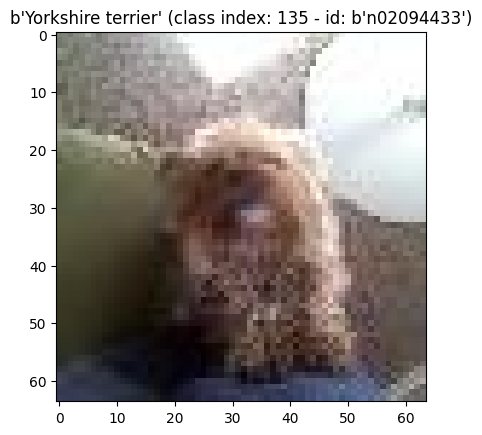

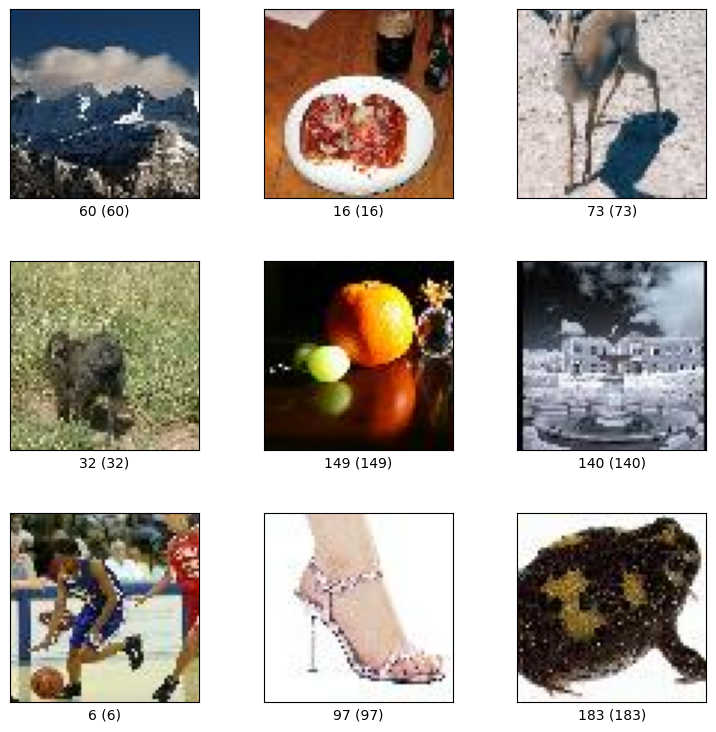

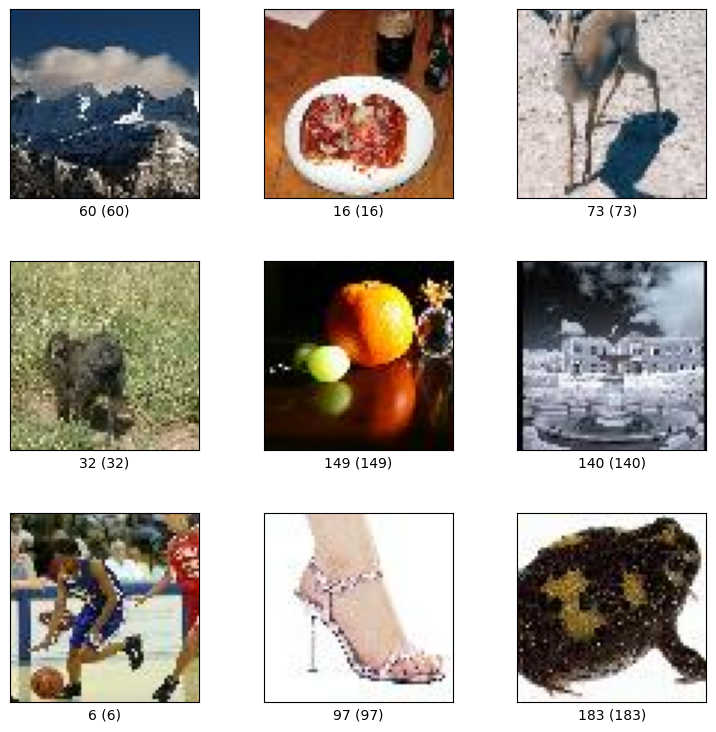

In [6]:
# Print the dataset types and info
print("--- Train & Validation dataset info ---")
print(f"Train: {ds_train}")
print(f"Validation: {ds_val}")
# print(f"Dataset Info: {ds_info}") # Uncomment to print Dataset info

print("\n--- Show an example image ---")
for example in ds_val.take(1):
    img_info(example)

print("\n Show some other examples")
tfds.show_examples(ds_val, ds_info, rows=3, cols=3)


--- Image 0 ---
dtype: uint8
shape: (64, 64, 3)
bytes: 12288
Label: b'plate' (class index: 143 - id: b'n07579787')

--- Image 1 ---
dtype: uint8
shape: (64, 64, 3)
bytes: 12288
Label: b'pomegranate' (class index: 170 - id: b'n07768694')

--- Image 2 ---
dtype: uint8
shape: (64, 64, 3)
bytes: 12288
Label: b'go-kart' (class index: 163 - id: b'n03444034')


2025-09-08 11:34:52.870650: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 11:34:52.878090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


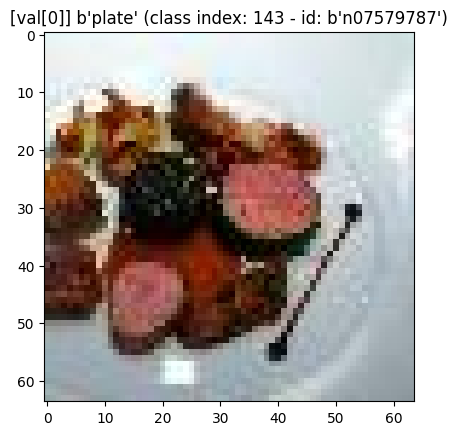

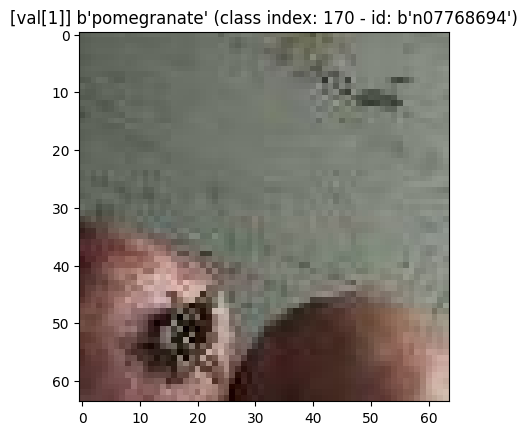

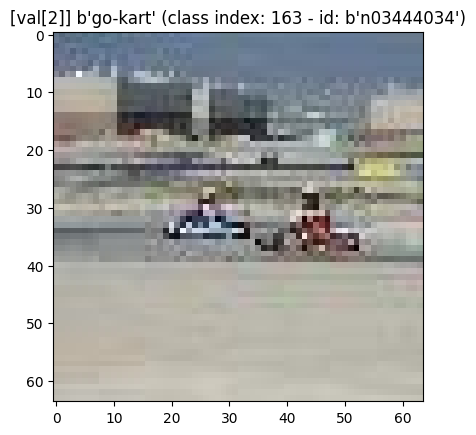

In [7]:
# TODO: Print and visualize three inputs from the validation set
#     : Print the stroage data type
#     : Print and note the dimensions of each image
#     : Print the memory required to store each image



# Sample Images
sample_imgs = []
for index, img_data in enumerate(ds_val.take(3)):
    sample_imgs.append(img_data)
    image = img_data["image"]            # tf.Tensor, uint8, shape (64,64,3)
    label = int(img_data["label"].numpy())
    label_name = class_names[label]

    # storage dtype
    print(f"\n--- Image {index} ---")
    print("dtype:", image.dtype.name)

    # dimensions
    h, w, c = image.shape
    print("shape:", (h, w, c))

    # bytes to store (uint8 = 1 byte each)
    bytes_needed = h * w * c * image.dtype.size
    print("bytes:", bytes_needed)

    # show
    img_info(img_data, display=True, title_apend=f"[val[{index}]] ")


In [8]:
# TODO: Export each of the three inputs to a binary file which will be used to load the images into C++ later
# NOTE: First flatten the array (ex: 4D --> 1D). So 64*64*3 = 12288 element 1D array

# Make a directory for our image data
img_dir = os.path.abspath('img_data')
pathlib.Path(img_dir).mkdir(exist_ok=True)

# Create a metadata file
with open(os.path.join(img_dir, 'metadata.txt'), 'w') as metadata_file:
    metadata_file.write('Number\t\tDims\t\tClass Data\n')

# Export each image (flatten to 1D, keep uint8 HWC order)
for index, img_data in enumerate(sample_imgs):
    image = img_data["image"].numpy().astype(np.uint8)    # (64,64,3)
    label = int(img_data["label"].numpy())
    label_name = class_names[label]

    flat = image.reshape(-1)                               # 64*64*3
    out_path = os.path.join(img_dir, f'image_{index}.bin')
    flat.tofile(out_path)

    with open(os.path.join(img_dir, 'metadata.txt'), 'a') as metadata_file:
        metadata_file.write(f'{index}\t\t{image.shape}\t\t{label_name} [{label}]\n')

print("Exported to:", img_dir)


Exported to: /home/zaza/cpre_487/lab1/img_data


## Model Loading and Inference

In [9]:
# TODO: Load the model
# Now we will load the H5 model! Please make sure the h5 model file is present in the below directory.
# You can download this from the Canvas Page and place it in the same directory as this notebook.

# model_path = os.path.abspath(""/home/<NETID>/path/to/your/lab1/CNN_TinyImageNet.h5)" # Uncomment this to use a non-relative path
model_path = os.path.abspath("CNN_TinyImageNet.h5")

from tensorflow.keras.models import load_model

# model_path already set in the cell above:
assert os.path.exists(model_path), f"Model file not found: {model_path}"
model = load_model(model_path)
model.summary()


/home/zaza/lab1_venv/lib64/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zaza/lab1_venv/lib64/python3.9/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        51,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 770,218 (2.94 MB)

 Trainable params: 770,216 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Label: [b'plate'] (class index: [143] - id: [b'n07579787'])


2025-09-08 11:34:55.241290: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
I0000 00:00:1757349295.351860   27807 service.cc:145] XLA service 0x7fddc0009320 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757349295.351892   27807 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-09-08 11:34:55.357911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Best Guess [class index]: ['plate'] [143]
Best Guess Confidence (percent / 1.0): [0.76704115]
Top 15 Guesses (class index): ["['plate'] [143]", "['pomegranate'] [170]", "['orange'] [149]", "['mashed potato'] [167]", "['meat loaf', 'meatloaf'] [192]", "['ice cream', 'icecream'] [28]", "['pill bottle'] [98]", "['espresso'] [8]", "['wooden spoon'] [126]", "['potpie'] [23]", "['pretzel'] [40]", "['teapot'] [71]", "['goldfish', 'Carassius auratus'] [22]", "['ladybug', 'ladybeetle', 'lady beetle', 'ladybird', 'ladybird beetle'] [76]", "['guacamole'] [53]"]
Top 15 Guesses Confidence (percent / 1.0): [[0.76704115 0.07170361 0.02351792 0.02152682 0.02102596 0.01411808
  0.01277892 0.01259817 0.0065238  0.00646035 0.00558897 0.00511025
  0.00494909 0.00481369 0.00481356]]


I0000 00:00:1757349295.443881   27807 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-09-08 11:34:55.495238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


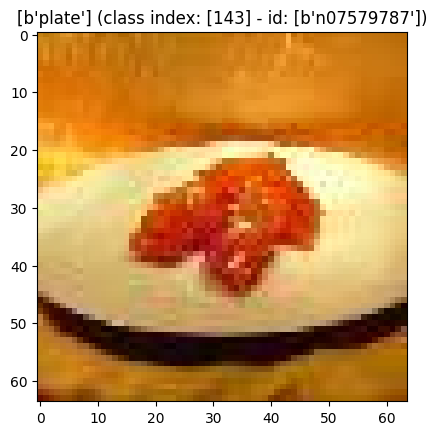

In [10]:
# Running infrence on our model
# We can run an infrence of our model by doing the following (we are doing batches of 1 here)
for example in ds_train.batch(1).take(1):
    img_info(example)
    
    # Make a prediction
    pred = model.predict(tf.cast(example["image"], tf.float32)/255.0)
    # print(f'Raw 200 Class Weighted Prediction:\n{pred}') 
    
    # What is out best guess?
    best_guess = tf.math.argmax(pred, axis=1).numpy() # Our output is 200 weighted value, we want the most likely
    print(f'Best Guess [class index]: {class_names[best_guess[0]]} [{best_guess[0]}]')
    print(f'Best Guess Confidence (percent / 1.0): {pred[0][best_guess]}')

    # What are our top 15 guesses?
    top_15 = tf.math.top_k(pred, k=15)
    print(f'Top 15 Guesses (class index): {[f"{class_names[idx]} [{idx}]" for idx in top_15.indices[0]]}')
    print(f'Top 15 Guesses Confidence (percent / 1.0): {top_15.values}')

In [11]:
# TODO: Run infrence for our previous 3 sample images

# TODO: Your Code Here
import numpy as np
import tensorflow as tf

def preprocess(img_u8):
    return (tf.cast(img_u8, tf.float32)/255.0)[None, ...]  # (1,64,64,3)

# If sample_imgs wasn't created earlier, make it now
try:
    sample_imgs
except NameError:
    sample_imgs = []
    for ex in ds_val.take(3):
        sample_imgs.append(ex)

def topk_with_names(probs, k=5):
    order = np.argsort(probs)[-k:][::-1]
    return [(int(i), class_names[i], float(probs[i])) for i in order]

for i, ex in enumerate(sample_imgs):
    img = ex["image"]          # uint8 (64,64,3)
    lab = int(ex["label"].numpy())
    probs = model.predict(preprocess(img), verbose=0)[0]

    top1 = int(np.argmax(probs))
    print(f"\nval[{i}] true={lab:3d}  {class_names[lab]}")
    print(f"Top-1:   {top1:3d}  {class_names[top1]:<40} p={probs[top1]:.3f}")
    for j,(idx,name,p) in enumerate(topk_with_names(probs, 5), start=1):
        print(f"Top-{j}: {idx:3d}  {name:<40} p={p:.3f}")



val[0] true=143  ['plate']
Top-1:    28  ['ice cream', 'icecream']                p=0.167
Top-1:  28  ['ice cream', 'icecream']                p=0.167
Top-2: 170  ['pomegranate']                          p=0.135
Top-3: 143  ['plate']                                p=0.133
Top-4:  87  ['bee']                                  p=0.048
Top-5: 151  ['American lobster', 'Northern lobster', 'Maine lobster', 'Homarus americanus'] p=0.029

val[1] true=170  ['pomegranate']
Top-1:   179  ['bathtub', 'bathing tub', 'bath', 'tub'] p=0.027
Top-1: 179  ['bathtub', 'bathing tub', 'bath', 'tub'] p=0.027
Top-2: 125  ['scorpion']                             p=0.027
Top-3:  28  ['ice cream', 'icecream']                p=0.022
Top-4: 170  ['pomegranate']                          p=0.021
Top-5:  45  ['pop bottle', 'soda bottle']            p=0.021

val[2] true=163  ['go-kart']
Top-1:    26  ['computer keyboard', 'keypad']          p=0.206
Top-1:  26  ['computer keyboard', 'keypad']          p=0.206
Top-2: 

In [12]:
# TODO: Calculate the Top-1, Top-5, and Top-10 Accuracy of the validation dataset
total = acc_top1 = acc_top5 = acc_top10 = 0

# TODO: Your Code Here
def eval_topk(N=200):
    t1=t5=t10=0
    for ex in ds_val.take(N).batch(1):
        img = ex["image"][0]
        lab = int(ex["label"][0].numpy())
        probs = model.predict((tf.cast(img, tf.float32)/255.0)[None,...], verbose=0)[0]
        order = np.argsort(probs)[::-1]
        t1  += (lab == order[0])
        t5  += (lab in order[:5])
        t10 += (lab in order[:10])
    return {"N":N, "Top1":t1/N, "Top5":t5/N, "Top10":t10/N}

eval_topk(200) 


2025-09-08 11:37:07.063809: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 11:37:07.109890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


{'N': 200, 'Top1': 0.205, 'Top5': 0.47, 'Top10': 0.595}

In [13]:
# TODO: Print all of the possible classes of the dataset

# TODO: Your Code Here
print("Total classes:", len(class_names))
# Print them all (long). For report, you can show first ~20 and attach a txt file.
for i, name in enumerate(class_names):
    print(f"{i:3d}: {name}")

Total classes: 200
  0: ['Egyptian cat']
  1: ['reel']
  2: ['volleyball']
  3: ['rocking chair', 'rocker']
  4: ['lemon']
  5: ['bullfrog', 'Rana catesbeiana']
  6: ['basketball']
  7: ['cliff', 'drop', 'drop-off']
  8: ['espresso']
  9: ['plunger', "plumber's helper"]
 10: ['parking meter']
 11: ['German shepherd', 'German shepherd dog', 'German police dog', 'alsatian']
 12: ['dining table', 'board']
 13: ['monarch', 'monarch butterfly', 'milkweed butterfly', 'Danaus plexippus']
 14: ['brown bear', 'bruin', 'Ursus arctos']
 15: ['school bus']
 16: ['pizza', 'pizza pie']
 17: ['guinea pig', 'Cavia cobaya']
 18: ['umbrella']
 19: ['organ', 'pipe organ']
 20: ['oboe', 'hautboy', 'hautbois']
 21: ['maypole']
 22: ['goldfish', 'Carassius auratus']
 23: ['potpie']
 24: ['hourglass']
 25: ['seashore', 'coast', 'seacoast', 'sea-coast']
 26: ['computer keyboard', 'keypad']
 27: ['Arabian camel', 'dromedary', 'Camelus dromedarius']
 28: ['ice cream', 'icecream']
 29: ['nail']
 30: ['space heat

## Model Exploration

In [14]:
# TODO: Visualize the model in Netron (https://netron.app/) and include an image here.
#tf.keras.utils.plot_model(model, "model.png", show_shapes=True, show_dtype=True, expand_nested=True) # Uncomment this to generate a simple visualization

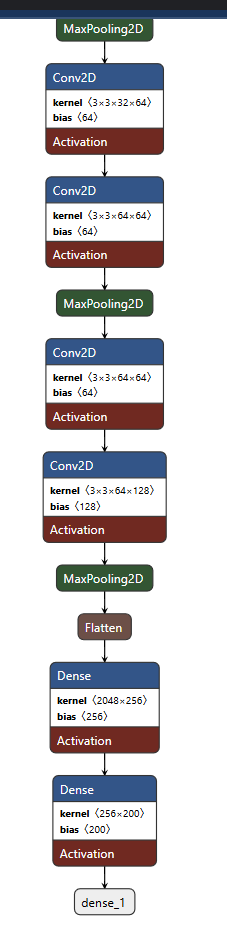

Early conv filters look like edge/texture detectors. Later-layer filters respond to higher-level, and their feature maps are spatially coarser from pooling. Kernel tensor give increasing channel count (32 - 64 - 128), indicates greater capacity deeper in network.

Early: conv2d [TensorShape([5, 5, 3, 32]), TensorShape([32])]
Late : conv2d_5 [TensorShape([3, 3, 64, 128]), TensorShape([128])]


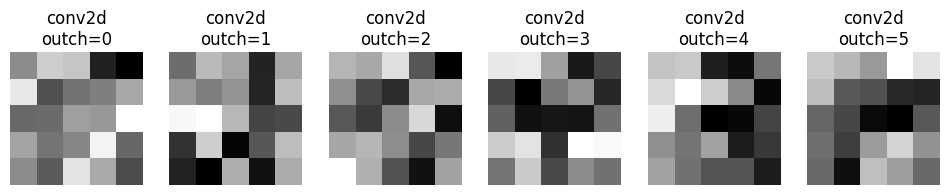

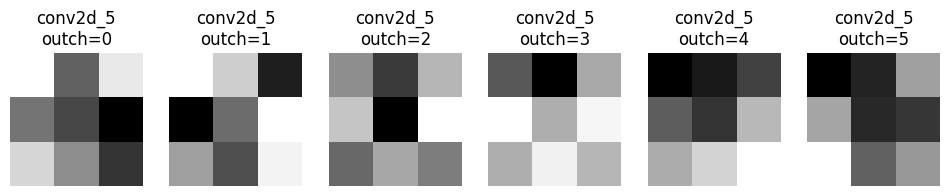

In [15]:
# We can view the layer weights. Here we consider them as images of feature filters applied to intermediate feature map images.
# TODO: Visualize the 2 convolutional layers filter sets (weights) (one at the beginning and one at the end)

# TODO: Your Code Here
import matplotlib.pyplot as plt
import numpy as np

# first and last in the stack
conv_layers = [l for l in model.layers if 'conv' in l.name.lower()]
assert len(conv_layers) >= 2, "Need at least two conv layers."
early, late = conv_layers[0], conv_layers[-1]

print("Early:", early.name, [w.shape for w in early.weights])
print("Late :", late.name,  [w.shape for w in late.weights])

def show_kernels(layer, in_ch=0, max_outch=6):
    """Visualize kernels that connect input channel `in_ch` to the first few output channels."""
    W = layer.get_weights()[0]   # (kh, kw, Cin, Cout)
    kh, kw, Cin, Cout = W.shape
    outch = min(max_outch, Cout)
    fig, axs = plt.subplots(1, outch, figsize=(2*outch, 2))
    if outch == 1: axs = [axs]
    for i in range(outch):
        k = W[..., in_ch, i]
        # normalize for display
        k = (k - k.mean()) / (k.std() + 1e-6)
        axs[i].imshow(k, cmap='gray')
        axs[i].set_title(f"{layer.name}\noutch={i}")
        axs[i].axis('off')
    plt.show()

show_kernels(early, in_ch=0, max_outch=6)
show_kernels(late,  in_ch=0, max_outch=6)


Early: conv2d [TensorShape([5, 5, 3, 32]), TensorShape([32])]
Late : conv2d_5 [TensorShape([3, 3, 64, 128]), TensorShape([128])]


2025-09-08 11:37:07.497060: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


conv2d activation: (1, 60, 60, 32) float32
conv2d_5 activation: (1, 8, 8, 128) float32


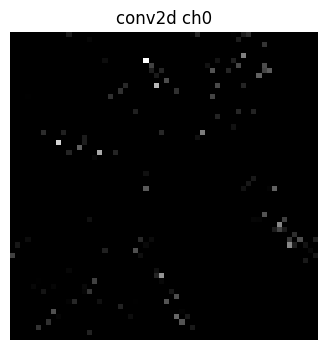

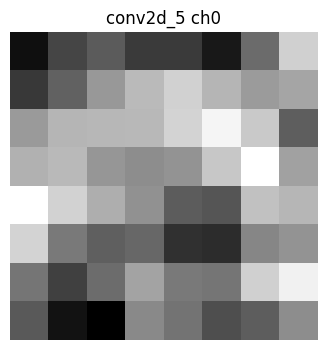

In [16]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def preprocess(img_u8):
    return (img_u8.astype("float32")/255.0)[None, ...]  # (1,64,64,3)

# 1) Force a SYMBOLIC build so model.inputs/outputs exist.
#    Calling with a symbolic Input wires the whole graph.
_ = model(tf.keras.Input(shape=(64, 64, 3)))

# 2) Find conv layers by type; keep their names (we’ll re-fetch them from the model).
conv_layers = [L for L in model.layers if isinstance(L, tf.keras.layers.Conv2D)]
assert len(conv_layers) >= 2, "Need at least two Conv2D layers."
early_name = conv_layers[0].name
late_name  = conv_layers[-1].name
print("Early:", early_name, [w.shape for w in model.get_layer(early_name).weights])
print("Late :", late_name,  [w.shape for w in model.get_layer(late_name).weights])

# 3) Build the activation model using tensors from THE SAME graph:
#    - inputs=model.inputs (not a fresh Input)
#    - outputs = model.get_layer(name).output (tied to this graph)
act_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=[model.get_layer(early_name).output,
             model.get_layer(late_name).output]
)

# 4) Take one validation image and run it
val_sample = next(iter(tiny_imagenet_builder.as_dataset(split='validation').batch(1)))
img = val_sample["image"][0].numpy()              # uint8 (64,64,3)
x   = preprocess(img)                             # float32 [0,1], (1,64,64,3)

a_early, a_late = act_model.predict(x, verbose=0)
print(early_name, "activation:", a_early.shape, a_early.dtype)
print(late_name,  "activation:", a_late.shape,  a_late.dtype)

# 5) Visualize one channel from each activation map
plt.figure(figsize=(4,4)); plt.imshow(a_early[0, ..., 0], cmap='gray'); plt.axis('off'); plt.title(f"{early_name} ch0"); plt.show()
plt.figure(figsize=(4,4)); plt.imshow(a_late[0,  ..., 0], cmap='gray');  plt.axis('off'); plt.title(f"{late_name} ch0");  plt.show()



In [17]:
# TODO: Export the filters/weights se we can use them later
# Make a directory for our image data
model_dir = os.path.abspath('model_data')
pathlib.Path(model_dir).mkdir(exist_ok=True)


# Export each image
conv_index = dense_index = 1 # layer index starts from one
for layer_idx, layer in enumerate(model.layers):
    if re.match(r'(conv|dense)', layer.name):
        weight_file_name = os.path.join(model_dir, f'{layer.name}_weights.bin')
        bias_file_name = os.path.join(model_dir, f'{layer.name}_bias.bin')
    else: continue

    assert layer.weights[0].name.endswith('kernel')
    assert layer.weights[1].name.endswith('bias')
        
    # TODO: Your Code Here

    import os, re, pathlib, numpy as np

# Export each image
conv_index = dense_index = 1  # Layer index starts from one (kept for style / future use)

for layer_idx, layer in enumerate(model.layers):
    # match conv or dense layers by name (conv2d, conv2d_5, dense, dense_1, etc.)
    if not re.match(r'(conv|dense)', layer.name):
        continue

    weight_file_name = os.path.join(model_dir, f'{layer.name}_weights.bin')
    bias_file_name   = os.path.join(model_dir, f'{layer.name}_bias.bin')

    # ----- Robust assertions on variable names -----
    # In Keras 3 the variables are named like ".../kernel:0" and ".../bias:0"
    assert "kernel" in layer.weights[0].name.split(":")[0], \
        f"Unexpected first weight for {layer.name}: {layer.weights[0].name}"
    assert "bias"   in layer.weights[1].name.split(":")[0], \
        f"Unexpected second weight for {layer.name}: {layer.weights[1].name}"

    # ----- Get NumPy arrays and write raw bytes -----
    W, b = layer.get_weights()  # W: kernel, b: bias; already np.ndarray
    W.tofile(weight_file_name)  # C-order raw bytes
    b.tofile(bias_file_name)

    # optional: bump indexes if you later want index-based filenames
    if layer.name.startswith('conv'):
        conv_index += 1
    elif layer.name.startswith('dense'):
        dense_index += 1

print("Saved weights/bias files to:", model_dir)


Saved weights/bias files to: /home/zaza/cpre_487/lab1/model_data


In [18]:
# TODO: Export the intermediate layer outputs for each of the input for all of the layers
img_dir = os.path.abspath('img_data')
pathlib.Path(img_dir).mkdir(exist_ok=True)

for img_idx, img in enumerate(sample_imgs):
    file_dir = os.path.join(img_dir, f'test_input_{img_idx}')
    pathlib.Path(file_dir).mkdir(exist_ok=True)
    
    # TODO: Your Code Here
    import os, json, pathlib, numpy as np
import tensorflow as tf

# 0) Make sure the model has a SYMBOLIC graph so layer.output is valid
_ = model(tf.keras.Input(shape=(64, 64, 3)))  # builds graph once

# 1) Build a single model that returns the output of EVERY layer, tied to THIS graph
#    (skip the InputLayer because it's just the input tensor)
export_layers = [L for L in model.layers if not isinstance(L, tf.keras.layers.InputLayer)]
act_model = tf.keras.Model(inputs=model.inputs,
                           outputs=[L.output for L in export_layers])

# 2) Iterate your three sample images and dump each layer's activation to a .bin
for img_idx, img_data in enumerate(sample_imgs):
    file_dir = os.path.join(img_dir, f'test_input_{img_idx}')
    pathlib.Path(file_dir).mkdir(exist_ok=True)

    # get uint8 image -> float32 [0,1] with batch dim
    img_u8 = img_data["image"].numpy()
    x = (img_u8.astype("float32") / 255.0)[None, ...]  # (1,64,64,3)

    # run once, get list of activations aligned with export_layers
    acts = act_model.predict(x, verbose=0)

    # save each activation as raw C-order bytes, plus a manifest for shapes/dtypes
    manifest = []
    for L, A in zip(export_layers, acts):
        A = np.asarray(A)  # ensure np.ndarray
        fname = f"{L.name}_activation.bin"
        (pathlib.Path(file_dir) / fname).write_bytes(A.tobytes())
        manifest.append({
            "layer": L.name,
            "dtype": str(A.dtype),
            "shape": list(A.shape),
            "file": fname
        })

    # write manifest.json inside this test_input_* folder
    with open(os.path.join(file_dir, "manifest.json"), "w") as f:
        json.dump(manifest, f, indent=2)

print("Exported activations for", len(sample_imgs), "inputs into:", img_dir)


Exported activations for 3 inputs into: /home/zaza/cpre_487/lab1/img_data


## Tensorboard

In [19]:
# Setup for profiling
tf.profiler.experimental.ProfilerOptions(
    host_tracer_level=1, python_tracer_level=0, device_tracer_level=1
)

log_dir = os.path.abspath(os.path.join('log_data'))
log_dir_run = os.path.abspath(os.path.join(log_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))
pathlib.Path(log_dir_run).mkdir(exist_ok=True, parents=True)

try:
    tf.profiler.experimental.stop()
except:
    test = 2
finally:
    test = 1

In [20]:
# TODO: Sample Profiling - Inference for a single image:

# Perform the inference profiling:
for example in ds_train.batch(1).take(1):
    # Starts Profile logging
    tf.profiler.experimental.start(log_dir_run)
    # Actual inference
    # TODO: Your Code Here
import os, time, tensorflow as tf
from datetime import datetime

# fresh subdir every run so TensorBoard sees a new trace
log_dir_run = os.path.join("tb_logs", datetime.now().strftime("%Y%m%d-%H%M%S"), "single_image")
os.makedirs(log_dir_run, exist_ok=True)

# if any stale profiler is running from a previous cell, stop it quietly
try:
    tf.profiler.experimental.stop()
except Exception:
    pass

for example in ds_train.batch(1).take(1):
    # Preprocess to float32 [0,1]; example["image"] already has batch dim (1, 64, 64, 3)
    x = tf.cast(example["image"], tf.float32) / 255.0

    # Use the context manager: starts on entry, stops on exit (avoids AlreadyExistsError)
    with tf.profiler.experimental.Profile(log_dir_run):
        t0 = time.perf_counter()
        _ = model.predict(x, verbose=0)
        t1 = time.perf_counter()

    print(f"Single-image latency: {(t1 - t0)*1e3:.2f} ms")
    print("Profile written to:", log_dir_run)


Single-image latency: 47.25 ms
Profile written to: tb_logs/20250908-113708/single_image


2025-09-08 11:37:08.570232: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 11:37:08.570482: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-09-08 11:37:08.570498: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-09-08 11:37:08.570553: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1239] Profiler found 1 GPUs
2025-09-08 11:37:08.572218: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:137] cuptiGetTimestamp: error 999: 
2025-09-08 11:37:08.572232: E external/local_xla/xla/backends/profiler/gpu/cupti_err

In [21]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

# Launch TensorBoard and navigate to the Profile tab to view performance profile. 
# *** Please note just execute this command once in a session and 
# then logs for subsequent runs would be auto detected in tensorboard- url: http://localhost:6006/
print(log_dir)
%tensorboard --logdir={log_dir_run} --port=6006

# You can view the tensorboard in the browser url: http://localhost:6006/

# Useful command line to have if tensorboard is misbehaving: kill $(ps -e | grep 'tensorboard' | awk '{print $1}')

/home/zaza/cpre_487/lab1/log_data


In [22]:
# TODO: Sample Profiling - Online Inference (batch=1)

import time, tensorflow as tf

def online_test(num_images):
    # deterministic slice from validation; keep it simple
    ds = tiny_imagenet_builder.as_dataset(split=f'validation[:{num_images}]', shuffle_files=False)

    t0 = time.perf_counter()
    for example in ds.batch(1):
        # preprocess to float32 [0,1]; example already has batch dim (1,64,64,3)
        x = tf.cast(example["image"], tf.float32) / 255.0
        _ = model.predict(x, verbose=0)
    t1 = time.perf_counter()

    total = t1 - t0
    ips = num_images / total
    ms = 1e3 * total / num_images
    print(f"Online (bs=1): {num_images:4d} imgs -> {total:6.3f}s | {ips:6.1f} img/s | {ms:6.2f} ms/img")

for n in [10, 100, 1000]:
    online_test(n)


2025-09-08 11:37:15.267436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Online (bs=1):   10 imgs ->  0.497s |   20.1 img/s |  49.69 ms/img


2025-09-08 11:37:19.881542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Online (bs=1):  100 imgs ->  4.588s |   21.8 img/s |  45.88 ms/img
Online (bs=1): 1000 imgs -> 46.421s |   21.5 img/s |  46.42 ms/img


2025-09-08 11:38:06.327879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
# TODO: Sample Profiling - Batch Inference (vary batch size)

import time, tensorflow as tf

def batch_test(n_images=1000, batch_size=100):
    # deterministic slice and pre-normalize inside the dataset pipeline
    ds = tiny_imagenet_builder.as_dataset(split=f'validation[:{n_images}]', shuffle_files=False)
    ds = ds.map(lambda ex: tf.cast(ex["image"], tf.float32)/255.0,
                num_parallel_calls=tf.data.AUTOTUNE) \
           .batch(batch_size) \
           .prefetch(tf.data.AUTOTUNE)

    t0 = time.perf_counter()
    count = 0
    for xb in ds:
        _ = model.predict(xb, verbose=0)  # xb shape: (batch,64,64,3)
        count += xb.shape[0]
    t1 = time.perf_counter()

    total = t1 - t0
    n_eff = count
    ips = n_eff / total
    ms = 1e3 * total / n_eff
    print(f"Batch {batch_size:3d}: {n_eff:4d} imgs -> {total:6.3f}s | {ips:7.1f} img/s | {ms:6.2f} ms/img")

for bs in [20, 40, 100, 200]:
    batch_test(n_images=1000, batch_size=bs)


2025-09-08 11:38:09.736543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Batch  20: 1000 imgs ->  3.359s |   297.7 img/s |   3.36 ms/img


2025-09-08 11:38:12.150959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Batch  40: 1000 imgs ->  2.380s |   420.2 img/s |   2.38 ms/img


2025-09-08 11:38:13.711613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Batch 100: 1000 imgs ->  1.523s |   656.6 img/s |   1.52 ms/img
Batch 200: 1000 imgs ->  1.287s |   777.1 img/s |   1.29 ms/img


2025-09-08 11:38:15.034824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Training

In [24]:
# Setup for model training
from tensorflow.keras import Model, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, ZeroPadding2D,Convolution2D, Activation, Dropout 

train_dir = os.path.abspath(os.path.join('train_data', datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))
pathlib.Path(train_dir).mkdir(exist_ok=True, parents=True)

# Using early stopping to monitor validation accuracy
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=train_dir, histogram_freq=1)
]

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [ ]:
# Basic CNN model
train_model = Sequential()

# conv1
train_model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3), activation='relu'))
train_model.add(Conv2D(32, (5,5),activation='relu'))
train_model.add(MaxPooling2D(pool_size=(2, 2)))
train_model.add(Conv2D(64, (3,3), activation='relu'))
train_model.add(Conv2D(64, (3,3), activation='relu'))
train_model.add(MaxPooling2D(pool_size=(2, 2)))
train_model.add(Conv2D(64, (3,3), activation='relu'))
train_model.add(Conv2D(128, (3,3), activation='relu'))
train_model.add(MaxPooling2D(pool_size=(2, 2)))
train_model.add(Flatten())

# fc1
train_model.add(Dense(256, activation='relu'))

# fc2
train_model.add(Dense(200, activation='softmax'))

train_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# TODO: Consider looking at different optimizers and learning rate settings
train_model.summary()

In [25]:
# TODO: Attempt to train your own model with different batch sizes
# TODO: See how long this takes without a GPU on your VDI or 2050 Coover machines
# TODO: THEN log in to your GPU VM, set ENABLE_GPU = False in the very first cell, and re-run all above cells
# TODO: Make sure you have exported the LD_LIBRARY_PATH as the lab manual indicates

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

def to_categorical(image, label):
    label = tf.one_hot(tf.cast(label, tf.int32), 200)
    return tf.cast(image, tf.float32), tf.cast(label, tf.int64)

ds_re = tiny_imagenet_builder.as_dataset(as_supervised=True)
ds_retrain, ds_reval = ds_re["train"], ds_re["validation"]

ds_retrain = ds_retrain.cache().shuffle(1024)
ds_reval = ds_reval.cache().shuffle(1024)

ds_retrain = ds_retrain.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_reval = ds_reval.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

ds_retrain = ds_retrain.map(to_categorical, num_parallel_calls=tf.data.AUTOTUNE)
ds_reval = ds_reval.map(to_categorical, num_parallel_calls=tf.data.AUTOTUNE)

epoch_size = 20


for batch_size in [32, 64, 128]:
    # Setup our batched datasets
    # TODO: Your Code Here
    import os, time, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime

def make_student_model(num_classes=200):
    """Small, fast CNN that trains well on Tiny-ImageNet @64×64."""
    m = keras.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPool2D(),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPool2D(),

        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.GlobalAveragePooling2D(),

        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ])
    m.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return m

# ---------- Dataset for this batch size ----------
train_ds = (
    ds_retrain
    .batch(batch_size, drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)
val_ds = (
    ds_reval
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# ---------- Callbacks & logging ----------
run_dir = os.path.join(
    "train_runs",
    f"bs{batch_size}_{datetime.now().strftime('%Y%m%d-%H%M%S')}"
)
os.makedirs(run_dir, exist_ok=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(run_dir, "best.h5"),
        monitor="val_accuracy", mode="max",
        save_best_only=True, verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy", mode="max",
        patience=3, restore_best_weights=True, verbose=1
    ),
    keras.callbacks.CSVLogger(os.path.join(run_dir, "log.csv")),
]

# ---------- Build, train, evaluate ----------
model_s = make_student_model()
t0 = time.perf_counter()
history = model_s.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch_size,
    verbose=1,
    callbacks=callbacks,
)
t1 = time.perf_counter()

val_loss, val_acc = model_s.evaluate(val_ds, verbose=0)

print({
    "batch_size": batch_size,
    "best_val_acc": float(max(history.history["val_accuracy"])),
    "final_val_acc": float(val_acc),
    "time_min": (t1 - t0) / 60.0,
    "run_dir": run_dir,
})


Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.0172 - loss: 5.1294
Epoch 1: val_accuracy improved from -inf to 0.06150, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 394s 503ms/step - accuracy: 0.0172 - loss: 5.1292 - val_accuracy: 0.0615 - val_loss: 4.6627
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.0572 - loss: 4.6708
Epoch 2: val_accuracy improved from 0.06150 to 0.09160, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 393s 503ms/step - accuracy: 0.0572 - loss: 4.6707 - val_accuracy: 0.0916 - val_loss: 4.3954
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.0844 - loss: 4.4321
Epoch 3: val_accuracy improved from 0.09160 to 0.12300, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 408s 522ms/step - accuracy: 0.0844 - loss: 4.4321 - val_accuracy: 0.1230 - val_loss: 4.1889
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.1073 - loss: 4.2752
Epoch 4: val_accuracy improved from 0.12300 to 0.14670, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 401s 514ms/step - accuracy: 0.1073 - loss: 4.2752 - val_accuracy: 0.1467 - val_loss: 4.0277
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.1251 - loss: 4.1394
Epoch 5: val_accuracy improved from 0.14670 to 0.16300, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 408s 523ms/step - accuracy: 0.1251 - loss: 4.1393 - val_accuracy: 0.1630 - val_loss: 3.9163
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.1383 - loss: 4.0414
Epoch 6: val_accuracy improved from 0.16300 to 0.17830, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 415s 531ms/step - accuracy: 0.1383 - loss: 4.0414 - val_accuracy: 0.1783 - val_loss: 3.8294
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.1475 - loss: 3.9714
Epoch 7: val_accuracy improved from 0.17830 to 0.18850, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 409s 523ms/step - accuracy: 0.1475 - loss: 3.9713 - val_accuracy: 0.1885 - val_loss: 3.7695
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.1600 - loss: 3.9038
Epoch 8: val_accuracy improved from 0.18850 to 0.20010, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 400s 513ms/step - accuracy: 0.1600 - loss: 3.9038 - val_accuracy: 0.2001 - val_loss: 3.7177
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.1682 - loss: 3.8533
Epoch 9: val_accuracy improved from 0.20010 to 0.20420, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 397s 508ms/step - accuracy: 0.1682 - loss: 3.8533 - val_accuracy: 0.2042 - val_loss: 3.6729
Epoch 10/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.1761 - loss: 3.8143
Epoch 10: val_accuracy did not improve from 0.20420
781/781 ━━━━━━━━━━━━━━━━━━━━ 379s 485ms/step - accuracy: 0.1761 - loss: 3.8143 - val_accuracy: 0.2042 - val_loss: 3.6608
Epoch 11/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.1795 - loss: 3.7749
Epoch 11: val_accuracy improved from 0.20420 to 0.22170, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 398s 510ms/step - accuracy: 0.1795 - loss: 3.7748 - val_accuracy: 0.2217 - val_loss: 3.5920
Epoch 12/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.1842 - loss: 3.7414
Epoch 12: val_accuracy improved from 0.22170 to 0.22520, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 405s 518ms/step - accuracy: 0.1842 - loss: 3.7414 - val_accuracy: 0.2252 - val_loss: 3.5462
Epoch 13/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.1905 - loss: 3.7108
Epoch 13: val_accuracy improved from 0.22520 to 0.23060, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 406s 519ms/step - accuracy: 0.1905 - loss: 3.7108 - val_accuracy: 0.2306 - val_loss: 3.5524
Epoch 14/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.1950 - loss: 3.6869
Epoch 14: val_accuracy improved from 0.23060 to 0.23490, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 400s 512ms/step - accuracy: 0.1950 - loss: 3.6869 - val_accuracy: 0.2349 - val_loss: 3.4830
Epoch 15/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.1950 - loss: 3.6613
Epoch 15: val_accuracy improved from 0.23490 to 0.24060, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 396s 507ms/step - accuracy: 0.1950 - loss: 3.6612 - val_accuracy: 0.2406 - val_loss: 3.4755
Epoch 16/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.2007 - loss: 3.6373
Epoch 16: val_accuracy did not improve from 0.24060
781/781 ━━━━━━━━━━━━━━━━━━━━ 409s 524ms/step - accuracy: 0.2007 - loss: 3.6373 - val_accuracy: 0.2388 - val_loss: 3.5071
Epoch 17/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.2046 - loss: 3.6177
Epoch 17: val_accuracy improved from 0.24060 to 0.24790, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 415s 531ms/step - accuracy: 0.2046 - loss: 3.6177 - val_accuracy: 0.2479 - val_loss: 3.4254
Epoch 18/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.2080 - loss: 3.5934
Epoch 18: val_accuracy improved from 0.24790 to 0.25590, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 411s 526ms/step - accuracy: 0.2080 - loss: 3.5934 - val_accuracy: 0.2559 - val_loss: 3.3860
Epoch 19/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.2118 - loss: 3.5774
Epoch 19: val_accuracy did not improve from 0.25590
781/781 ━━━━━━━━━━━━━━━━━━━━ 402s 515ms/step - accuracy: 0.2118 - loss: 3.5774 - val_accuracy: 0.2530 - val_loss: 3.4094
Epoch 20/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.2131 - loss: 3.5698
Epoch 20: val_accuracy improved from 0.25590 to 0.25830, saving model to train_runs/bs128_20250908-114019/best.h5


781/781 ━━━━━━━━━━━━━━━━━━━━ 442s 515ms/step - accuracy: 0.2131 - loss: 3.5698 - val_accuracy: 0.2583 - val_loss: 3.3767
Restoring model weights from the end of the best epoch: 20.
{'batch_size': 128, 'best_val_acc': 0.2583000063896179, 'final_val_acc': 0.2583000063896179, 'time_min': 134.7933994769856, 'run_dir': 'train_runs/bs128_20250908-114019'}


In [27]:
#using small subset so runs finish quickly
import os, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

log_dir = "train_runs_fast"
os.makedirs(log_dir, exist_ok=True)

TRAIN_LIMIT = 4_000   # << keep runs short (full train ~100k)
VAL_LIMIT   = 1_000   # << keep eval short  (full val 10k)

def to_xy(ex):
    img = tf.cast(ex["image"], tf.float32) / 255.0
    lab = tf.one_hot(tf.cast(ex["label"], tf.int32), 200)
    return img, lab

train_small = (tiny_imagenet_builder.as_dataset(split="train")
               .take(TRAIN_LIMIT)                                  # << speed
               .map(to_xy, num_parallel_calls=tf.data.AUTOTUNE)
               .cache().shuffle(4096))

val_small   = (tiny_imagenet_builder.as_dataset(split="validation")
               .take(VAL_LIMIT)                                    # << speed
               .map(to_xy, num_parallel_calls=tf.data.AUTOTUNE)
               .cache())

def make_cnn(num_classes=200):
    m = keras.Sequential([
        layers.Input(shape=(64,64,3)),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax"),
    ])
    m.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return m

def quick_topk(model, N=500):
    """Quick Top-1/Top-5 on a small validation slice for speed."""
    t1=t5=0
    ds = (tiny_imagenet_builder.as_dataset(split="validation")
            .skip(VAL_LIMIT).take(N).batch(1))
    for ex in ds:
        img = ex["image"][0]
        lab = int(ex["label"][0].numpy())
        probs = model.predict((tf.cast(img, tf.float32)/255.0)[None,...], verbose=0)[0]
        order = tf.argsort(probs, direction="DESCENDING").numpy()
        t1 += (lab == order[0])
        t5 += (lab in order[:5])
    return {"N": N, "Top1": t1/N, "Top5": t5/N}

batch_size = 32

for epoch_size in [1, 3, 4]:
    # Run training
    train_ds = train_small.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
    val_ds   = val_small.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    train_model = make_cnn()
    history = train_model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epoch_size,
        callbacks=[
            keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max",
                                          patience=1, restore_best_weights=True, verbose=1),
            keras.callbacks.CSVLogger(os.path.join(log_dir, f"log_bs{batch_size}_e{epoch_size}.csv")),
        ],
        verbose=1,
    )

    # Save the cnn model
    train_model.save(os.path.join(log_dir, f'CNN_TinyImageNet_train_batch{batch_size}_e{epoch_size}.h5'))

    # Get the top-1 and top-5 of your newly trained model (fast slice)
    metrics = quick_topk(train_model, N=500)
    best_val = float(max(history.history["val_accuracy"]))
    print({"epochs": epoch_size, "batch": batch_size, "best_val_acc": best_val, **metrics})


2025-09-08 14:03:58.709006: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.0057 - loss: 5.3024 - val_accuracy: 0.0070 - val_loss: 5.2753
Restoring model weights from the end of the best epoch: 1.


2025-09-08 14:04:14.449300: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


{'epochs': 1, 'batch': 32, 'best_val_acc': 0.007000000216066837, 'N': 500, 'Top1': 0.006, 'Top5': 0.048}
Epoch 1/3


2025-09-08 14:04:37.687322: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 14:04:37.732877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.0073 - loss: 5.2992 - val_accuracy: 0.0050 - val_loss: 5.2908
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.0116 - loss: 5.2653 - val_accuracy: 0.0170 - val_loss: 5.2147
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.0093 - loss: 5.1688 - val_accuracy: 0.0170 - val_loss: 5.1638
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 2.


{'epochs': 3, 'batch': 32, 'best_val_acc': 0.017000000923871994, 'N': 500, 'Top1': 0.016, 'Top5': 0.05}
Epoch 1/4


2025-09-08 14:05:46.121223: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 14:05:46.168693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.0039 - loss: 5.3006 - val_accuracy: 0.0030 - val_loss: 5.2963
Epoch 2/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.0098 - loss: 5.2792 - val_accuracy: 0.0120 - val_loss: 5.2490
Epoch 3/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.0126 - loss: 5.1871 - val_accuracy: 0.0180 - val_loss: 5.1848
Epoch 4/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.0143 - loss: 5.1282 - val_accuracy: 0.0150 - val_loss: 5.1361
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 3.


{'epochs': 4, 'batch': 32, 'best_val_acc': 0.017999999225139618, 'N': 500, 'Top1': 0.014, 'Top5': 0.048}


2025-09-08 14:07:09.186231: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-08 14:07:09.232892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Above and Beyond

In [ ]:
# Benchmark our dataset to make sure loading our data isn't a bottleneck ... and because we can
# (This can be skipped since it can take a bit and is't all that important)

# tfds.benchmark(ds_train.batch(32), batch_size=32, num_iter=2**20)

In [ ]:
# Explore new models to find a higher-accuracy model. Does the new model require more or less time?